### Import Libraries ###
---

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [278]:
df = pd.read_csv(r'..\Data\Helthcare WHO.csv')

In [279]:
df

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258


In [281]:
df['Medical Condition'].isna().sum()

np.int64(4500)

In [282]:
df = df.dropna(subset=['Medical Condition'])

In [283]:
df['Medical Condition'].isna().sum()

np.int64(0)

In [284]:
df.shape

(25500, 20)

In [285]:
X = df.drop(columns=['Medical Condition'])
y = df['Medical Condition']

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [288]:
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

In [289]:
test_data = X_test.join(y_test)

In [40]:
test_data.to_csv(r'..\Data\test_data.csv', index=False)

In [290]:
X_train

,Age,Gender,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,55.0,Male,85.09,158.17,34.90,96.95,4,210.16,156.81,4.80,1,1,2.15,3.77,0,6.75,4.93,??,48.549610
1,78.0,NaN,74.35,123.24,27.16,92.20,3,262.73,255.94,7.05,1,1,2.76,3.99,1,8.47,7.32,??,-108.061031
2,47.0,Male,129.66,117.48,30.69,93.11,4,209.10,183.18,6.53,0,0,2.30,3.18,0,5.27,6.48,###,9.062648
3,46.0,Male,115.43,164.53,27.08,98.26,3,291.11,161.43,5.88,0,1,3.09,3.67,1,5.31,5.95,??,-29.842012
4,41.0,Female,71.23,132.24,33.42,92.05,3,201.50,212.28,5.64,1,0,2.61,2.08,1,1.92,6.74,??,64.791205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,NaN,Male,103.17,134.74,34.99,91.10,3,240.78,275.56,6.31,0,0,1.49,3.54,0,5.75,6.43,??,81.826212
20396,55.0,Female,105.27,127.72,29.32,93.46,5,203.89,258.22,6.35,0,0,1.91,5.57,0,6.31,6.95,###,180.758021
20397,56.0,Male,NaN,130.58,24.82,96.54,3,252.41,215.65,6.04,1,0,2.53,4.37,1,-1.55,6.67,ipsum,15.441363
20398,37.0,Male,102.85,117.12,27.46,93.89,17,255.35,147.11,4.95,0,0,4.46,3.75,0,7.74,6.87,??,148.532020


In [292]:
y_train

0             Obesity
1        Hypertension
2             Obesity
3        Hypertension
4             Obesity
             ...     
20395         Obesity
20396       Arthritis
20397       Arthritis
20398          Cancer
20399          Asthma
Name: Medical Condition, Length: 20400, dtype: object

In [293]:
X_train.select_dtypes(include=['object'])

,Gender,random_notes
0,Male,??
1,NaN,??
2,Male,###
3,Male,??
4,Female,??
...,...,...
20395,Male,??
20396,Female,###
20397,Male,ipsum
20398,Male,??


In [294]:
X_train.drop(columns=['random_notes'], inplace=True)

In [295]:
X_train

,Age,Gender,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
0,55.0,Male,85.09,158.17,34.90,96.95,4,210.16,156.81,4.80,1,1,2.15,3.77,0,6.75,4.93,48.549610
1,78.0,NaN,74.35,123.24,27.16,92.20,3,262.73,255.94,7.05,1,1,2.76,3.99,1,8.47,7.32,-108.061031
2,47.0,Male,129.66,117.48,30.69,93.11,4,209.10,183.18,6.53,0,0,2.30,3.18,0,5.27,6.48,9.062648
3,46.0,Male,115.43,164.53,27.08,98.26,3,291.11,161.43,5.88,0,1,3.09,3.67,1,5.31,5.95,-29.842012
4,41.0,Female,71.23,132.24,33.42,92.05,3,201.50,212.28,5.64,1,0,2.61,2.08,1,1.92,6.74,64.791205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,NaN,Male,103.17,134.74,34.99,91.10,3,240.78,275.56,6.31,0,0,1.49,3.54,0,5.75,6.43,81.826212
20396,55.0,Female,105.27,127.72,29.32,93.46,5,203.89,258.22,6.35,0,0,1.91,5.57,0,6.31,6.95,180.758021
20397,56.0,Male,NaN,130.58,24.82,96.54,3,252.41,215.65,6.04,1,0,2.53,4.37,1,-1.55,6.67,15.441363
20398,37.0,Male,102.85,117.12,27.46,93.89,17,255.35,147.11,4.95,0,0,4.46,3.75,0,7.74,6.87,148.532020


#### Remove Outliers ####

As we are dealing with health data, and have already dropped 4500 rows that didnt have the Medical Condition, the approach will be to clip the outliers instead of dropping more rows and lose more data.

In [296]:
limits = pd.DataFrame(columns=['var', 'low', 'high'])

In [297]:
for i, col in enumerate (X_train.select_dtypes(include=np.number).columns):
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low = (Q1 - 1.5 * IQR).round(2)
    high = (Q3 + 1.5 * IQR).round(2)
    limits.loc[i] = [col, low, high]
    print (f'{col}: {low}, {high}')

Age: 13.5, 97.5
Glucose: 35.63, 197.28
Blood Pressure: 81.77, 197.18
BMI: 13.74, 42.7
Oxygen Saturation: 86.43, 103.95
LengthOfStay: 0.0, 8.0
Cholesterol: 120.15, 304.68
Triglycerides: 40.4, 309.41
HbA1c: 2.94, 9.3
Smoking: -1.5, 2.5
Alcohol: 0.0, 0.0
Physical Activity: -1.74, 9.18
Diet Score: -0.6, 8.41
Family History: -1.5, 2.5
Stress Level: -0.26, 12.06
Sleep Hours: 2.95, 9.51
noise_col: -267.59, 268.67


In [298]:
limits.set_index('var', inplace=True)

In [299]:
limits

,low,high
var,,
Age,13.50,97.50
Glucose,35.63,197.28
Blood Pressure,81.77,197.18
BMI,13.74,42.70
Oxygen Saturation,86.43,103.95
LengthOfStay,0.00,8.00
Cholesterol,120.15,304.68
Triglycerides,40.40,309.41
HbA1c,2.94,9.30


Glucose (CLIP)

In [300]:
X_train.loc[X_train['Glucose'] < 50].sort_values('Glucose', ascending=False)#limits.loc['Glucose']['low']]

,Age,Gender,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
4981,67.0,Male,48.62,176.72,30.71,93.99,6,257.83,244.92,5.21,1,1,2.98,1.59,1,6.25,4.75,-97.176707
7543,66.0,Male,46.67,148.33,20.96,94.75,2,224.11,132.16,4.89,0,0,4.04,4.33,0,7.51,6.19,166.397102
16865,NaN,Female,46.34,141.94,25.64,93.84,5,173.69,176.37,5.35,0,0,3.88,3.71,0,6.79,6.65,-2.013192
4454,66.0,Female,46.19,131.24,28.72,96.02,1,169.45,138.30,5.15,0,0,7.20,5.05,1,2.66,7.92,-51.690785
1933,65.0,Female,44.70,NaN,31.69,95.87,6,162.77,81.08,4.86,0,1,2.34,5.95,0,1.65,8.13,22.469491
17480,NaN,Male,44.56,NaN,24.29,93.89,2,264.47,246.19,5.79,0,0,4.23,5.01,1,8.83,5.32,89.721569
670,68.0,Male,44.35,181.04,33.00,96.28,6,159.34,182.64,6.74,1,0,3.38,3.63,0,8.54,6.43,-97.438205
6930,77.0,Female,41.06,124.24,24.40,87.70,19,203.06,225.12,4.96,0,0,1.68,6.06,0,5.47,4.73,9.050755
14639,53.0,Male,29.50,163.86,24.46,93.89,3,166.42,156.76,5.17,0,0,4.46,1.99,1,6.93,6.64,148.233920
6041,65.0,Female,20.32,112.45,28.32,93.21,4,228.86,219.25,7.90,0,1,1.55,1.90,1,7.87,7.95,-45.391730


In [301]:
X_train.loc[X_train['Glucose'] < limits.loc['Glucose']['low'],'Glucose'] = limits.loc['Glucose']['low']

In [302]:
X_train.loc[X_train['Glucose'] < 50].sort_values('Glucose', ascending=False)

,Age,Gender,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
4981,67.0,Male,48.62,176.72,30.71,93.99,6,257.83,244.92,5.21,1,1,2.98,1.59,1,6.25,4.75,-97.176707
7543,66.0,Male,46.67,148.33,20.96,94.75,2,224.11,132.16,4.89,0,0,4.04,4.33,0,7.51,6.19,166.397102
16865,NaN,Female,46.34,141.94,25.64,93.84,5,173.69,176.37,5.35,0,0,3.88,3.71,0,6.79,6.65,-2.013192
4454,66.0,Female,46.19,131.24,28.72,96.02,1,169.45,138.30,5.15,0,0,7.20,5.05,1,2.66,7.92,-51.690785
1933,65.0,Female,44.70,NaN,31.69,95.87,6,162.77,81.08,4.86,0,1,2.34,5.95,0,1.65,8.13,22.469491
17480,NaN,Male,44.56,NaN,24.29,93.89,2,264.47,246.19,5.79,0,0,4.23,5.01,1,8.83,5.32,89.721569
670,68.0,Male,44.35,181.04,33.00,96.28,6,159.34,182.64,6.74,1,0,3.38,3.63,0,8.54,6.43,-97.438205
6930,77.0,Female,41.06,124.24,24.40,87.70,19,203.06,225.12,4.96,0,0,1.68,6.06,0,5.47,4.73,9.050755
6041,65.0,Female,35.63,112.45,28.32,93.21,4,228.86,219.25,7.90,0,1,1.55,1.90,1,7.87,7.95,-45.391730
14639,53.0,Male,35.63,163.86,24.46,93.89,3,166.42,156.76,5.17,0,0,4.46,1.99,1,6.93,6.64,148.233920


#### Inconsistencies/Incoherences ####

In [303]:
X_train.loc[X_train['Physical Activity'] < 0, 'Physical Activity'] = 0

In [304]:
X_train.loc[X_train['Diet Score'] < 0, 'Diet Score'] = 0

In [305]:
X_train.loc[X_train['Stress Level'] < 0, 'Stress Level'] = 0

In [306]:
X_train.loc[X_train['Sleep Hours']<3].sort_values('Sleep Hours', ascending=True)

,Age,Gender,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
11523,68.0,Female,200.12,134.35,29.63,99.02,8,176.79,117.05,6.70,0,0,0.70,1.42,0,4.25,1.59,-115.683985
11185,NaN,NaN,132.77,145.50,39.27,95.16,2,246.09,193.60,6.72,0,0,5.37,5.34,0,7.25,2.00,11.084448
17582,NaN,NaN,99.87,178.34,31.68,94.36,8,254.86,113.34,6.85,1,0,5.48,0.20,0,3.85,2.03,202.076765
18235,65.0,NaN,88.32,160.36,25.58,91.53,3,246.74,263.72,7.09,1,0,4.43,4.90,1,11.01,2.11,-61.711095
13100,81.0,Female,NaN,137.56,28.82,89.21,2,165.20,170.43,6.35,0,0,3.05,5.00,1,7.72,2.19,-65.623588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6567,66.0,Male,224.75,141.25,23.96,98.73,4,202.44,227.74,9.04,0,0,2.99,1.66,0,5.22,2.94,179.141653
14310,35.0,Male,97.00,151.39,21.87,87.15,18,227.81,121.86,5.91,1,1,2.57,3.47,1,9.40,2.95,7.945723
19408,NaN,Female,105.87,151.38,24.23,96.38,5,217.12,195.05,5.63,0,1,5.31,5.27,1,4.61,2.96,-40.421255
3838,60.0,Male,137.27,131.09,23.95,91.73,7,218.89,196.39,9.41,0,0,5.48,3.48,0,7.46,2.96,-145.156404


In [314]:
X_train['Smoking'].value_counts()

Smoking
0    14750
1     5650
Name: count, dtype: int64

In [316]:
X_train.loc[(X_train['Smoking']==1) & (X_train['Age']<12)].sort_values('Age', ascending=True)

,Age,Gender,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
583,10.0,Male,101.46,132.06,21.10,86.88,3,197.51,114.00,6.53,1,0,6.72,4.37,1,5.39,4.19,49.764801
1635,10.0,NaN,93.46,120.23,28.73,98.57,2,242.13,135.26,5.28,1,1,5.29,5.71,0,1.96,7.48,-160.775351
3450,10.0,Male,85.82,122.62,30.21,86.81,4,249.27,220.19,5.75,1,0,4.41,5.88,0,5.64,7.06,191.204198
8293,10.0,Female,120.45,121.74,27.11,82.66,5,185.66,173.43,5.99,1,0,5.05,5.11,0,3.66,5.96,-116.681441
7165,10.0,Male,92.00,123.74,26.72,87.54,6,222.28,135.54,5.73,1,0,5.85,3.95,0,6.37,5.85,234.032742
7707,10.0,Female,NaN,123.23,26.62,93.81,2,214.99,111.70,6.42,1,0,8.49,3.00,0,5.55,5.91,62.478780
6532,10.0,Female,105.96,117.24,26.57,78.07,4,206.18,148.56,5.59,1,0,7.08,2.07,1,1.32,4.79,-49.901255
5068,10.0,NaN,109.23,113.41,24.83,87.21,2,226.34,167.78,5.25,1,0,4.13,5.14,1,7.80,5.08,-160.282065
17750,10.0,Male,111.67,NaN,23.61,91.28,2,250.58,160.93,4.84,1,0,7.70,5.70,1,5.38,6.37,77.162487
18163,10.0,NaN,92.17,123.73,22.37,96.72,3,222.22,165.52,6.13,1,0,2.77,4.62,0,3.18,5.63,-72.091172


In [317]:
X_train.loc[(X_train['Smoking']>0) & (X_train['Age']<12), 'Smoking'] = 0

In [325]:
X_train['Smoking'].value_counts()

Smoking
0    14774
1     5626
Name: count, dtype: int64

In [319]:
X_train.loc[(X_train['Alcohol']==1) & (X_train['Age']<12)].sort_values('Age', ascending=True)

,Age,Gender,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
1635,10.0,NaN,93.46,120.23,28.73,98.57,2,242.13,135.26,5.28,0,1,5.29,5.71,0,1.96,7.48,-160.775351
11742,10.0,Female,98.79,155.45,24.83,102.90,3,166.73,201.74,6.35,0,1,7.52,2.90,0,6.59,7.42,-119.099501
14731,10.0,Male,129.48,147.08,29.94,96.22,6,233.37,160.38,5.59,0,1,8.21,6.20,0,5.55,5.66,-93.548692
5108,11.0,NaN,114.71,115.47,22.62,89.04,4,206.19,185.24,5.59,0,1,4.72,6.09,0,1.92,5.39,14.128517
8775,11.0,Male,110.92,108.27,25.77,92.22,5,173.39,141.00,5.72,0,1,6.58,4.85,0,5.56,3.87,-90.314048
6147,11.0,NaN,114.69,88.15,29.76,88.38,5,238.36,127.59,4.79,0,1,5.77,3.16,0,4.22,5.59,-79.518581


In [320]:
X_train.loc[(X_train['Alcohol']>0) & (X_train['Age']<12), 'Alcohol'] = 0

In [324]:
X_train['Alcohol'].value_counts()

Alcohol
0    15502
1     4898
Name: count, dtype: int64

In [326]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
X_train[['Gender']] = cat_imputer.fit_transform(X_train[['Gender']])

In [327]:
X_train = pd.get_dummies(X_train, drop_first=False)

In [328]:
X_train.drop(columns=['Gender_Unknown'], inplace=True)

In [ ]:
X_train['Gender_Male'].replace({False:0, True:1}, inplace=True)
X_train['Gender_Female'].replace({False:0, True:1}, inplace=True)

In [330]:
X_train

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col,Gender_Female,Gender_Male
0,55.0,85.09,158.17,34.90,96.95,4,210.16,156.81,4.80,1,1,2.15,3.77,0,6.75,4.93,48.549610,0,1
1,78.0,74.35,123.24,27.16,92.20,3,262.73,255.94,7.05,1,1,2.76,3.99,1,8.47,7.32,-108.061031,0,0
2,47.0,129.66,117.48,30.69,93.11,4,209.10,183.18,6.53,0,0,2.30,3.18,0,5.27,6.48,9.062648,0,1
3,46.0,115.43,164.53,27.08,98.26,3,291.11,161.43,5.88,0,1,3.09,3.67,1,5.31,5.95,-29.842012,0,1
4,41.0,71.23,132.24,33.42,92.05,3,201.50,212.28,5.64,1,0,2.61,2.08,1,1.92,6.74,64.791205,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,NaN,103.17,134.74,34.99,91.10,3,240.78,275.56,6.31,0,0,1.49,3.54,0,5.75,6.43,81.826212,0,1
20396,55.0,105.27,127.72,29.32,93.46,5,203.89,258.22,6.35,0,0,1.91,5.57,0,6.31,6.95,180.758021,1,0
20397,56.0,NaN,130.58,24.82,96.54,3,252.41,215.65,6.04,1,0,2.53,4.37,1,0.00,6.67,15.441363,0,1
20398,37.0,102.85,117.12,27.46,93.89,17,255.35,147.11,4.95,0,0,4.46,3.75,0,7.74,6.87,148.532020,0,1


#### Handling Missing Values ####
---

In [331]:
df_num = X_train.copy()

In [332]:
df_num

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col,Gender_Female,Gender_Male
0,55.0,85.09,158.17,34.90,96.95,4,210.16,156.81,4.80,1,1,2.15,3.77,0,6.75,4.93,48.549610,0,1
1,78.0,74.35,123.24,27.16,92.20,3,262.73,255.94,7.05,1,1,2.76,3.99,1,8.47,7.32,-108.061031,0,0
2,47.0,129.66,117.48,30.69,93.11,4,209.10,183.18,6.53,0,0,2.30,3.18,0,5.27,6.48,9.062648,0,1
3,46.0,115.43,164.53,27.08,98.26,3,291.11,161.43,5.88,0,1,3.09,3.67,1,5.31,5.95,-29.842012,0,1
4,41.0,71.23,132.24,33.42,92.05,3,201.50,212.28,5.64,1,0,2.61,2.08,1,1.92,6.74,64.791205,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,NaN,103.17,134.74,34.99,91.10,3,240.78,275.56,6.31,0,0,1.49,3.54,0,5.75,6.43,81.826212,0,1
20396,55.0,105.27,127.72,29.32,93.46,5,203.89,258.22,6.35,0,0,1.91,5.57,0,6.31,6.95,180.758021,1,0
20397,56.0,NaN,130.58,24.82,96.54,3,252.41,215.65,6.04,1,0,2.53,4.37,1,0.00,6.67,15.441363,0,1
20398,37.0,102.85,117.12,27.46,93.89,17,255.35,147.11,4.95,0,0,4.46,3.75,0,7.74,6.87,148.532020,0,1


#### Impute Median to NaN so it can be scaled ####

In [333]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

In [335]:
df_num.isna().sum()

Age                  3077
Glucose              3008
Blood Pressure       3057
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
noise_col               0
Gender_Female           0
Gender_Male             0
dtype: int64

In [336]:
cols_to_input = ['Age', 'Glucose', 'Blood Pressure']

In [337]:
mask_missing = df_num[cols_to_input].isna()

In [338]:
mask_missing

,Age,Glucose,Blood Pressure
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
20395,True,False,False
20396,False,False,False
20397,False,True,False
20398,False,False,False


In [339]:
df_temp = df_num.copy()

In [340]:
median_imputer = SimpleImputer(strategy='median')

In [341]:
df_temp[cols_to_input] = median_imputer.fit_transform(df_num[cols_to_input])

In [342]:
df_num[cols_to_input]

,Age,Glucose,Blood Pressure
0,55.0,85.09,158.17
1,78.0,74.35,123.24
2,47.0,129.66,117.48
3,46.0,115.43,164.53
4,41.0,71.23,132.24
...,...,...,...
20395,NaN,103.17,134.74
20396,55.0,105.27,127.72
20397,56.0,NaN,130.58
20398,37.0,102.85,117.12


In [343]:
df_temp[cols_to_input]

,Age,Glucose,Blood Pressure
0,55.0,85.090,158.17
1,78.0,74.350,123.24
2,47.0,129.660,117.48
3,46.0,115.430,164.53
4,41.0,71.230,132.24
...,...,...,...
20395,55.0,103.170,134.74
20396,55.0,105.270,127.72
20397,56.0,110.485,130.58
20398,37.0,102.850,117.12


In [344]:
scaler = StandardScaler()

In [345]:
df_temp_scaled = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns)

In [346]:
df_temp_scaled

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col,Gender_Female,Gender_Male
0,0.020409,-0.949270,0.921535,1.119114,0.532989,-0.147225,-0.087165,-0.409764,-1.131017,1.620501,1.779035,-0.825064,-0.148625,-0.879636,0.375813,-1.092823,0.482674,-0.867946,1.172306
1,1.581744,-1.228016,-0.863656,-0.232136,-0.737363,-0.510742,1.477347,1.618654,0.575192,1.620501,1.779035,-0.521054,-0.027763,1.136834,1.151285,0.917099,-1.088080,-0.867946,-0.853020
2,-0.522665,0.207498,-1.158036,0.384132,-0.493990,-0.147225,-0.118711,0.129825,0.180868,-0.617093,-0.562103,-0.750307,-0.472753,-0.879636,-0.291454,0.210683,0.086633,-0.867946,1.172306
3,-0.590549,-0.161827,1.246579,-0.246103,0.883338,-0.510742,2.321952,-0.315228,-0.312037,-0.617093,1.779035,-0.356589,-0.203562,1.136834,-0.273420,-0.235032,-0.303568,-0.867946,1.172306
4,-0.929970,-1.308992,-0.403687,0.860736,-0.777479,-0.510742,-0.344891,0.725275,-0.494032,1.620501,-0.562103,-0.595810,-1.077061,1.136834,-1.801822,0.429335,0.645572,1.152145,-0.853020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,0.020409,-0.480023,-0.275918,1.134826,-1.031550,-0.510742,0.824103,2.020123,0.014039,-0.617093,-0.562103,-1.153994,-0.274980,-0.879636,-0.075043,0.168634,0.816427,-0.867946,1.172306
20396,0.020409,-0.425519,-0.634693,0.144957,-0.400386,0.216293,-0.273764,1.665308,0.044371,-0.617093,-0.562103,-0.944675,0.840243,-0.879636,0.177436,0.605939,1.808681,1.152145,-0.853020
20397,0.088293,-0.290169,-0.488525,-0.640654,0.423337,-0.510742,1.170218,0.794232,-0.190706,1.620501,-0.562103,-0.635680,0.180998,1.136834,-2.667465,0.370467,0.150609,-0.867946,1.172306
20398,-1.201507,-0.488328,-1.176435,-0.179762,-0.285385,4.578503,1.257714,-0.608247,-1.017270,-0.617093,-0.562103,0.326189,-0.159612,-0.879636,0.822160,0.538661,1.485465,-0.867946,1.172306


In [347]:
df_knn = df_temp_scaled.copy()

In [348]:
df_knn [cols_to_input] = df_knn[cols_to_input].mask(mask_missing)

In [349]:
df_knn

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col,Gender_Female,Gender_Male
0,0.020409,-0.949270,0.921535,1.119114,0.532989,-0.147225,-0.087165,-0.409764,-1.131017,1.620501,1.779035,-0.825064,-0.148625,-0.879636,0.375813,-1.092823,0.482674,-0.867946,1.172306
1,1.581744,-1.228016,-0.863656,-0.232136,-0.737363,-0.510742,1.477347,1.618654,0.575192,1.620501,1.779035,-0.521054,-0.027763,1.136834,1.151285,0.917099,-1.088080,-0.867946,-0.853020
2,-0.522665,0.207498,-1.158036,0.384132,-0.493990,-0.147225,-0.118711,0.129825,0.180868,-0.617093,-0.562103,-0.750307,-0.472753,-0.879636,-0.291454,0.210683,0.086633,-0.867946,1.172306
3,-0.590549,-0.161827,1.246579,-0.246103,0.883338,-0.510742,2.321952,-0.315228,-0.312037,-0.617093,1.779035,-0.356589,-0.203562,1.136834,-0.273420,-0.235032,-0.303568,-0.867946,1.172306
4,-0.929970,-1.308992,-0.403687,0.860736,-0.777479,-0.510742,-0.344891,0.725275,-0.494032,1.620501,-0.562103,-0.595810,-1.077061,1.136834,-1.801822,0.429335,0.645572,1.152145,-0.853020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,NaN,-0.480023,-0.275918,1.134826,-1.031550,-0.510742,0.824103,2.020123,0.014039,-0.617093,-0.562103,-1.153994,-0.274980,-0.879636,-0.075043,0.168634,0.816427,-0.867946,1.172306
20396,0.020409,-0.425519,-0.634693,0.144957,-0.400386,0.216293,-0.273764,1.665308,0.044371,-0.617093,-0.562103,-0.944675,0.840243,-0.879636,0.177436,0.605939,1.808681,1.152145,-0.853020
20397,0.088293,NaN,-0.488525,-0.640654,0.423337,-0.510742,1.170218,0.794232,-0.190706,1.620501,-0.562103,-0.635680,0.180998,1.136834,-2.667465,0.370467,0.150609,-0.867946,1.172306
20398,-1.201507,-0.488328,-1.176435,-0.179762,-0.285385,4.578503,1.257714,-0.608247,-1.017270,-0.617093,-0.562103,0.326189,-0.159612,-0.879636,0.822160,0.538661,1.485465,-0.867946,1.172306


In [350]:
knn = KNNImputer(n_neighbors=5)
df_knn[cols_to_input] = knn.fit_transform(df_knn[cols_to_input])

In [351]:
df_knn

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col,Gender_Female,Gender_Male
0,0.020409,-0.949270,0.921535,1.119114,0.532989,-0.147225,-0.087165,-0.409764,-1.131017,1.620501,1.779035,-0.825064,-0.148625,-0.879636,0.375813,-1.092823,0.482674,-0.867946,1.172306
1,1.581744,-1.228016,-0.863656,-0.232136,-0.737363,-0.510742,1.477347,1.618654,0.575192,1.620501,1.779035,-0.521054,-0.027763,1.136834,1.151285,0.917099,-1.088080,-0.867946,-0.853020
2,-0.522665,0.207498,-1.158036,0.384132,-0.493990,-0.147225,-0.118711,0.129825,0.180868,-0.617093,-0.562103,-0.750307,-0.472753,-0.879636,-0.291454,0.210683,0.086633,-0.867946,1.172306
3,-0.590549,-0.161827,1.246579,-0.246103,0.883338,-0.510742,2.321952,-0.315228,-0.312037,-0.617093,1.779035,-0.356589,-0.203562,1.136834,-0.273420,-0.235032,-0.303568,-0.867946,1.172306
4,-0.929970,-1.308992,-0.403687,0.860736,-0.777479,-0.510742,-0.344891,0.725275,-0.494032,1.620501,-0.562103,-0.595810,-1.077061,1.136834,-1.801822,0.429335,0.645572,1.152145,-0.853020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,-0.481934,-0.480023,-0.275918,1.134826,-1.031550,-0.510742,0.824103,2.020123,0.014039,-0.617093,-0.562103,-1.153994,-0.274980,-0.879636,-0.075043,0.168634,0.816427,-0.867946,1.172306
20396,0.020409,-0.425519,-0.634693,0.144957,-0.400386,0.216293,-0.273764,1.665308,0.044371,-0.617093,-0.562103,-0.944675,0.840243,-0.879636,0.177436,0.605939,1.808681,1.152145,-0.853020
20397,0.088293,0.847782,-0.488525,-0.640654,0.423337,-0.510742,1.170218,0.794232,-0.190706,1.620501,-0.562103,-0.635680,0.180998,1.136834,-2.667465,0.370467,0.150609,-0.867946,1.172306
20398,-1.201507,-0.488328,-1.176435,-0.179762,-0.285385,4.578503,1.257714,-0.608247,-1.017270,-0.617093,-0.562103,0.326189,-0.159612,-0.879636,0.822160,0.538661,1.485465,-0.867946,1.172306


In [352]:
df_knn.isna().sum()

Age                  0
Glucose              0
Blood Pressure       0
BMI                  0
Oxygen Saturation    0
LengthOfStay         0
Cholesterol          0
Triglycerides        0
HbA1c                0
Smoking              0
Alcohol              0
Physical Activity    0
Diet Score           0
Family History       0
Stress Level         0
Sleep Hours          0
noise_col            0
Gender_Female        0
Gender_Male          0
dtype: int64

In [353]:
X_train_scaled = df_knn.copy()

#### Feature Selection ####
---

In [354]:
from sklearn.feature_selection import mutual_info_classif

In [355]:
mi = mutual_info_classif(X_train_scaled, y_train, discrete_features='auto', random_state=42)

In [356]:
mi_series = pd.Series(mi, index=X_train_scaled.columns).sort_values(ascending=False)
print(mi_series)

LengthOfStay         0.603118
HbA1c                0.447563
Physical Activity    0.358498
Age                  0.356869
Glucose              0.349931
Diet Score           0.304599
Blood Pressure       0.251508
BMI                  0.209066
Triglycerides        0.173151
Cholesterol          0.154756
Stress Level         0.147445
Sleep Hours          0.141978
Oxygen Saturation    0.140033
Family History       0.038382
Smoking              0.038161
Alcohol              0.020146
noise_col            0.000000
Gender_Female        0.000000
Gender_Male          0.000000
dtype: float64


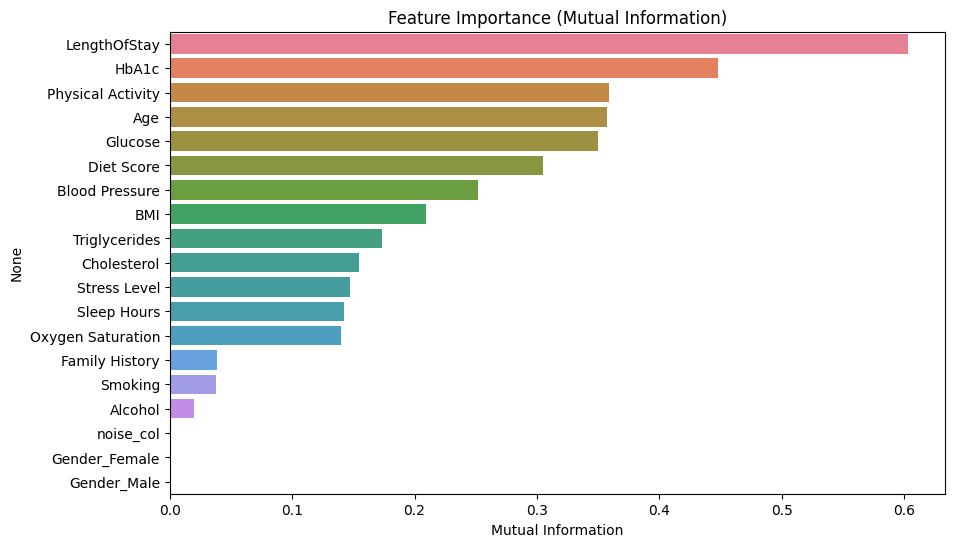

In [357]:
plt.figure(figsize=(10,6))
sns.barplot(x=mi_series.values, y=mi_series.index, hue = mi_series.index)
plt.title("Feature Importance (Mutual Information)")
plt.xlabel("Mutual Information")
plt.show()

- Noise_col can be droppes as expected.
- Gender also doesnt seem to be important, also as expected given that in the Data Understanding stage, we could see that there was little to no variation in regard to Gender.

IMPORTANT: LenghtOfStay is the feature that reduced more entropy (uncertainty) of y, when known, HOWEVER, this specific feature, logically, won't be available in the beginning of the process, but only in the end, so it is almost 'Data Leakage'. This means it should be dropped as well.

In [358]:
X_train_for_modeling = X_train_scaled.drop(columns=['noise_col', 'Gender_Male', 'Gender_Female', 'LengthOfStay'])

In [359]:
from sklearn.preprocessing import LabelEncoder

In [360]:
le = LabelEncoder()

In [361]:
y_train_enc = le.fit_transform(y_train)

In [362]:
y_train_enc

array([6, 5, 6, ..., 0, 2, 1], shape=(20400,))

In [363]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class mapping:", label_mapping)

Class mapping: {'Arthritis': np.int64(0), 'Asthma': np.int64(1), 'Cancer': np.int64(2), 'Diabetes': np.int64(3), 'Healthy': np.int64(4), 'Hypertension': np.int64(5), 'Obesity': np.int64(6)}


In [364]:
train_preprocessed = X_train_for_modeling.join(pd.DataFrame(y_train_enc, columns=['target']))

In [365]:
train_preprocessed

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,target
0,0.020409,-0.949270,0.921535,1.119114,0.532989,-0.087165,-0.409764,-1.131017,1.620501,1.779035,-0.825064,-0.148625,-0.879636,0.375813,-1.092823,6
1,1.581744,-1.228016,-0.863656,-0.232136,-0.737363,1.477347,1.618654,0.575192,1.620501,1.779035,-0.521054,-0.027763,1.136834,1.151285,0.917099,5
2,-0.522665,0.207498,-1.158036,0.384132,-0.493990,-0.118711,0.129825,0.180868,-0.617093,-0.562103,-0.750307,-0.472753,-0.879636,-0.291454,0.210683,6
3,-0.590549,-0.161827,1.246579,-0.246103,0.883338,2.321952,-0.315228,-0.312037,-0.617093,1.779035,-0.356589,-0.203562,1.136834,-0.273420,-0.235032,5
4,-0.929970,-1.308992,-0.403687,0.860736,-0.777479,-0.344891,0.725275,-0.494032,1.620501,-0.562103,-0.595810,-1.077061,1.136834,-1.801822,0.429335,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,-0.481934,-0.480023,-0.275918,1.134826,-1.031550,0.824103,2.020123,0.014039,-0.617093,-0.562103,-1.153994,-0.274980,-0.879636,-0.075043,0.168634,6
20396,0.020409,-0.425519,-0.634693,0.144957,-0.400386,-0.273764,1.665308,0.044371,-0.617093,-0.562103,-0.944675,0.840243,-0.879636,0.177436,0.605939,0
20397,0.088293,0.847782,-0.488525,-0.640654,0.423337,1.170218,0.794232,-0.190706,1.620501,-0.562103,-0.635680,0.180998,1.136834,-2.667465,0.370467,0
20398,-1.201507,-0.488328,-1.176435,-0.179762,-0.285385,1.257714,-0.608247,-1.017270,-0.617093,-0.562103,0.326189,-0.159612,-0.879636,0.822160,0.538661,2


#### Exports ###
---

In [366]:
train_preprocessed.to_csv(r'..\Data\train_preprocessed.csv', index=False)

In [367]:
import joblib

In [368]:
joblib.dump(scaler, r'..\Preprocessing\scaler.pkl')
joblib.dump(median_imputer, r'..\Preprocessing\median_imputer.pkl')
joblib.dump(knn, r'..\Preprocessing\knn_imputer.pkl')
joblib.dump(le, r'..\Preprocessing\label_encoder.pkl')

['..\\Preprocessing\\label_encoder.pkl']